# Problema

O âmbito escolar é uma das fases mais importantes para o crescimento social. Mas quais são os dados relevantes a essa situação, em um país de dimensões continentais?

De acordo com o problema, e escolhido um nicho para se estudar o que há de parâmetros relevantes, o foco deste projeto é o estudo estatístico de como se comporta o censo escolar na questão da docência na região sudeste do país.

Alguns dados como idade, sexo e a licencitatura, essênciais para o estudo do problema, são combinados com questões de maior afunilamento, prevendo ao final de estudo uma situação da qual poderiamos ter uma possível "abertura" a solução: quantos professores, dentro de uma amostra, serão de determinada matéria (neste caso, matemática), sendo levado em conta questões pertinentes ao cargo, como diploma, idade, pós-graduação, entre outros?

# Impotando os módulos a serem utilizados

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.__version__

'1.2.4'

In [7]:
np.__version__

'1.19.5'

# Transformação dos Dados

In [8]:
#importando dados do sudeste
data_doc = pd.read_csv("DADOS/docentes_sudeste.csv", sep="|", nrows=500000)

In [9]:
#a primeira linha abaixo faz com que todas as colunas sejam mostradas, e a segunda apresenta as primeiras 5 linhas

pd.set_option("display.max_columns", None)
data_doc = data_doc
data_doc.head(5)

,NU_ANO_CENSO,ID_DOCENTE,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,TP_LOCAL_RESID_DIFERENCIADA,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,TP_ESCOLARIDADE,TP_ENSINO_MEDIO,TP_SITUACAO_CURSO_1,CO_AREA_CURSO_1,CO_CURSO_1,IN_LICENCIATURA_1,NU_ANO_CONCLUSAO_1,TP_TIPO_IES_1,CO_IES_1,TP_SITUACAO_CURSO_2,CO_AREA_CURSO_2,CO_CURSO_2,IN_LICENCIATURA_2,NU_ANO_CONCLUSAO_2,TP_TIPO_IES_2,CO_IES_2,TP_SITUACAO_CURSO_3,CO_AREA_CURSO_3,CO_CURSO_3,IN_LICENCIATURA_3,NU_ANO_CONCLUSAO_3,TP_TIPO_IES_3,CO_IES_3,IN_COMPLEMENTACAO_PEDAGOGICA,CO_AREA_COMPL_PEDAGOGICA_1,CO_AREA_COMPL_PEDAGOGICA_2,CO_AREA_COMPL_PEDAGOGICA_3,IN_ESPECIALIZACAO,IN_MESTRADO,IN_DOUTORADO,IN_POS_NENHUM,IN_ESPECIFICO_CRECHE,IN_ESPECIFICO_PRE_ESCOLA,IN_ESPECIFICO_ANOS_INICIAIS,IN_ESPECIFICO_ANOS_FINAIS,IN_ESPECIFICO_ENS_MEDIO,IN_ESPECIFICO_EJA,IN_ESPECIFICO_ED_ESPECIAL,IN_ESPECIFICO_ED_INDIGENA,IN_ESPECIFICO_CAMPO,IN_ESPECIFICO_AMBIENTAL,IN_ESPECIFICO_DIR_HUMANOS,IN_ESPECIFICO_DIV_SEXUAL,IN_ESPECIFICO_DIR_ADOLESC,IN_ESPECIFICO_AFRO,IN_ESPECIFICO_GESTAO,IN_ESPECIFICO_OUTROS,IN_ESPECIFICO_NENHUM,ID_TURMA,TP_TIPO_DOCENTE,TP_TIPO_CONTRATACAO,IN_DISC_LINGUA_PORTUGUESA,IN_DISC_EDUCACAO_FISICA,IN_DISC_ARTES,IN_DISC_LINGUA_INGLES,IN_DISC_LINGUA_ESPANHOL,IN_DISC_LINGUA_FRANCES,IN_DISC_LINGUA_OUTRA,IN_DISC_LIBRAS,IN_DISC_LINGUA_INDIGENA,IN_DISC_PORT_SEGUNDA_LINGUA,IN_DISC_MATEMATICA,IN_DISC_CIENCIAS,IN_DISC_FISICA,IN_DISC_QUIMICA,IN_DISC_BIOLOGIA,IN_DISC_HISTORIA,IN_DISC_GEOGRAFIA,IN_DISC_SOCIOLOGIA,IN_DISC_FILOSOFIA,IN_DISC_ESTUDOS_SOCIAIS,IN_DISC_EST_SOCIAIS_SOCIOLOGIA,IN_DISC_INFORMATICA_COMPUTACAO,IN_DISC_ENSINO_RELIGIOSO,IN_DISC_PROFISSIONALIZANTE,IN_DISC_ESTAGIO_SUPERVISIONADO,IN_DISC_PEDAGOGICAS,IN_DISC_OUTRAS,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,TP_ETAPA_ENSINO,CO_CURSO_EDUC_PROFISSIONAL,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
0,2020,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,33,1,1,1,76,35.0,3550308.0,NaN,NaN,1.0,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0,0.0,0114M011,1,2015.0,2.0,316.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21282104,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1,0.0,1,25.0,NaN,0.0,1.0,0.0,0.0,35127231,3,3515,35061,35,3550308,355030891,4,1,4.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,2020,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,33,1,1,1,76,35.0,3550308.0,NaN,NaN,1.0,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0,0.0,0114M011,1,2015.0,2.0,316.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21282105,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1,0.0,1,26.0,NaN,0.0,1.0,0.0,0.0,35127231,3,3515,35061,35,3550308,355030891,4,1,4.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,2020,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,33,1,1,1,76,35.0,3550308.0,NaN,NaN,1.0,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0,0.0,0114M011,1,2015.0,2.0,316.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21282106,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,N

In [10]:
#Escolhendo os dados que serão utilizados nos testes gerais

dados_1 = data_doc[
    [
        'ID_DOCENTE',
        'NU_MES',
        'NU_ANO',
        'NU_IDADE_REFERENCIA',
        'TP_SEXO',
        'TP_COR_RACA', 
        'TP_NACIONALIDADE',
        'IN_NECESSIDADE_ESPECIAL', 
        'TP_ESCOLARIDADE',
        'IN_LICENCIATURA_1',
        'IN_ESPECIALIZACAO',
        'IN_MESTRADO',
        'IN_DOUTORADO',
        'IN_POS_NENHUM', 
        'TP_TIPO_DOCENTE',
        'IN_DISC_LINGUA_PORTUGUESA', 
        'IN_DISC_EDUCACAO_FISICA', 
        'IN_DISC_ARTES', 
        'IN_DISC_LINGUA_INGLES', 
        'IN_DISC_MATEMATICA', 
        'IN_DISC_CIENCIAS', 
        'IN_DISC_FISICA', 
        'IN_DISC_QUIMICA', 
        'IN_DISC_BIOLOGIA', 
        'IN_DISC_HISTORIA', 
        'IN_DISC_GEOGRAFIA', 
        'IN_DISC_SOCIOLOGIA', 
        'IN_DISC_FILOSOFIA', 
        'IN_REGULAR'
    ]
]

In [11]:
#Renomeando as colunas
dados_1 = dados_1.rename(
    columns={
        "NU_MES":"Mês Nasc.", 
        "NU_ANO": "Ano Nasc.",
        "NU_IDADE_REFERENCIA":"Idade", 
        "TP_SEXO":"Sexo", 
        "TP_COR_RACA":"Etnia", 
        "TP_NACIONALIDADE":"Nacionalidade",
        "IN_NECESSIDADE_ESPECIAL": "Nec. Especial", 
        "TP_ESCOLARIDADE":"Grau Escolaridade",
        "IN_LICENCIATURA_1":"Licenciatura", 
        "IN_ESPECIALIZACAO":"Com espec.", 
        "IN_MESTRADO":"Com mestrado", 
        "IN_DOUTORADO":"Com doutorado", 
        "IN_POS_NENHUM":"Sem pós", 
        "TP_TIPO_DOCENTE":"Tipo de Docência",
        "IN_DISC_LINGUA_PORTUGUESA":"Língua Portuguesa", 
        "IN_DISC_EDUCACAO_FISICA":"Ed. Física", 
        "IN_DISC_ARTES":"Artes", 
        "IN_DISC_LINGUA_INGLES":"Inglês", 
        "IN_DISC_MATEMATICA":"Matemática", 
        "IN_DISC_CIENCIAS":"Ciências", 
        "IN_DISC_FISICA":"Física", 
        "IN_DISC_QUIMICA":"Química", 
        "IN_DISC_BIOLOGIA":"Biologia", 
        "IN_DISC_HISTORIA":"História", 
        "IN_DISC_GEOGRAFIA":"Geografia", 
        "IN_DISC_SOCIOLOGIA":"Sociologia", 
        "IN_DISC_FILOSOFIA":"Filosofia", 
        "IN_REGULAR": "Ens. Regular"})
dados_1

,ID_DOCENTE,Mês Nasc.,Ano Nasc.,Idade,Sexo,Etnia,Nacionalidade,Nec. Especial,Grau Escolaridade,Licenciatura,Com espec.,Com mestrado,Com doutorado,Sem pós,Tipo de Docência,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia,Ens. Regular
0,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1B6C8CD672EA8E843E26EEF7DF5FB781,7,1957,62,2,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1.0
499996,1B6C9E6E73C94C8B1412BCB6CA85AE9F,7,1987,32,2,1,1,0,4,1,0.0,0.0,0.0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
499997,1B6CB9800788D83E292600F77FE1BC19,12,1973,46,2,2,1,0,3,0,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1.0
499998,1B6CB9800788D83E292600F77FE1BC19,12,1973,46,2,2,1,0,3,0,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1.0


In [12]:
#Verificando os dados nulos

dados_1 = dados_1[dados_1.isnull().values.any(axis=1)]
NAvalues = dados_1.isnull().sum()

NAvaluesFrame = pd.DataFrame(NAvalues.sort_values(ascending = False), columns = ['NaN_Values'])

NAvaluesFrame

,NaN_Values
Ciências,222866
Física,183466
Sociologia,183466
Biologia,183466
Química,183466
Ed. Física,84538
Língua Portuguesa,84538
Matemática,84538
Artes,84538
História,84538


In [13]:
dados_1.fillna(0, inplace=True)
dados_1.isna().sum()

C:\Users\sergi\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


ID_DOCENTE           0
Mês Nasc.            0
Ano Nasc.            0
Idade                0
Sexo                 0
Etnia                0
Nacionalidade        0
Nec. Especial        0
Grau Escolaridade    0
Licenciatura         0
Com espec.           0
Com mestrado         0
Com doutorado        0
Sem pós              0
Tipo de Docência     0
Língua Portuguesa    0
Ed. Física           0
Artes                0
Inglês               0
Matemática           0
Ciências             0
Física               0
Química              0
Biologia             0
História             0
Geografia            0
Sociologia           0
Filosofia            0
Ens. Regular         0
dtype: int64

In [14]:
#Dimensões do dataframe

print('Rows: {}\nColumns: {}'.format(dados_1.shape[0], dados_1.shape[1]))

Rows: 325260
Columns: 29


## Análises Estatísticas

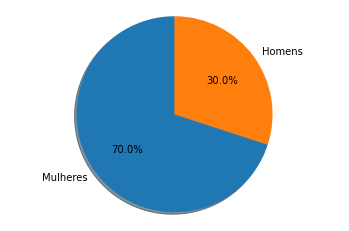

In [15]:
#plotando dados referentes a porcentagem de homens e mulheres docentes na região sudeste, para uma amostra 'x'

labels = 'Mulheres', 'Homens'
sizes = dados_1['Sexo'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

36    438
40    437
42    436
34    388
39    367
38    361
44    361
45    356
46    350
41    347
32    346
37    340
35    301
51    298
52    282
47    277
33    277
30    275
43    268
49    265
50    237
48    235
27    209
55    201
31    188
26    173
54    169
28    166
29    143
59    140
53    135
58    131
57    129
56    125
61    116
25    108
24     82
62     80
22     77
63     70
20     64
23     62
60     46
66     31
64     21
65     20
21     17
18     16
69     11
72      7
71      7
70      5
67      4
19      4
68      1
Name: Idade, dtype: int64

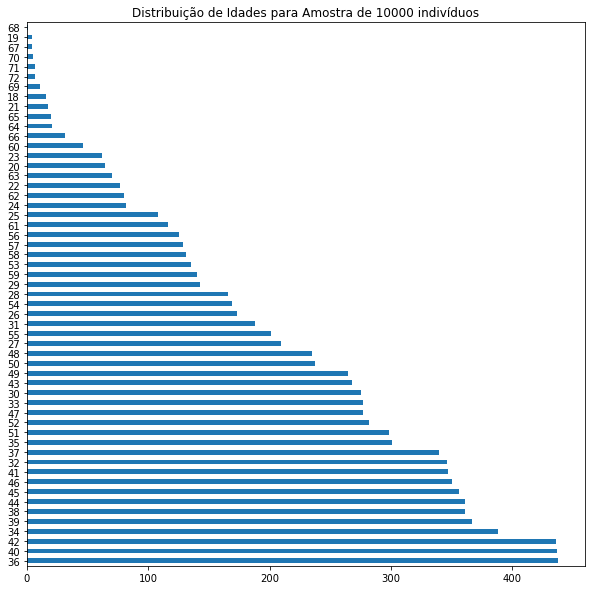

In [16]:
#Amostragem dos dados referente a idade dos professores

idades = dados_1['Idade'][:10000].value_counts().sort_values(ascending=False)

plt.figure(figsize = (10, 10))
idades.plot.barh()
plt.title("Distribuição de Idades para Amostra de 10000 indivíduos")

idades


Text(0.5, 1.0, 'Histograma de Idads para Amostra de 10000 indivíduos')

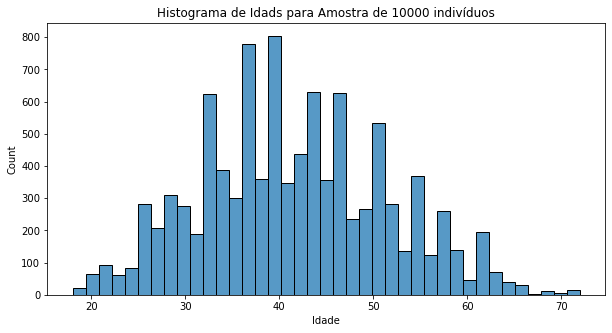

In [17]:
plt.figure(figsize = (10, 5))
sns.histplot(data = dados_1['Idade'][:10000])
plt.title("Histograma de Idads para Amostra de 10000 indivíduos")

In [18]:
#Porcentagem de pessoas com e sem deficiência, para verificação de contagem

contagem_deficiencia = dados_1['Nec. Especial'].value_counts(normalize=True).sort_values(ascending=False)
print(round(contagem_deficiencia * 100, 2).to_frame())

   Nec. Especial
0          99.85
1           0.15


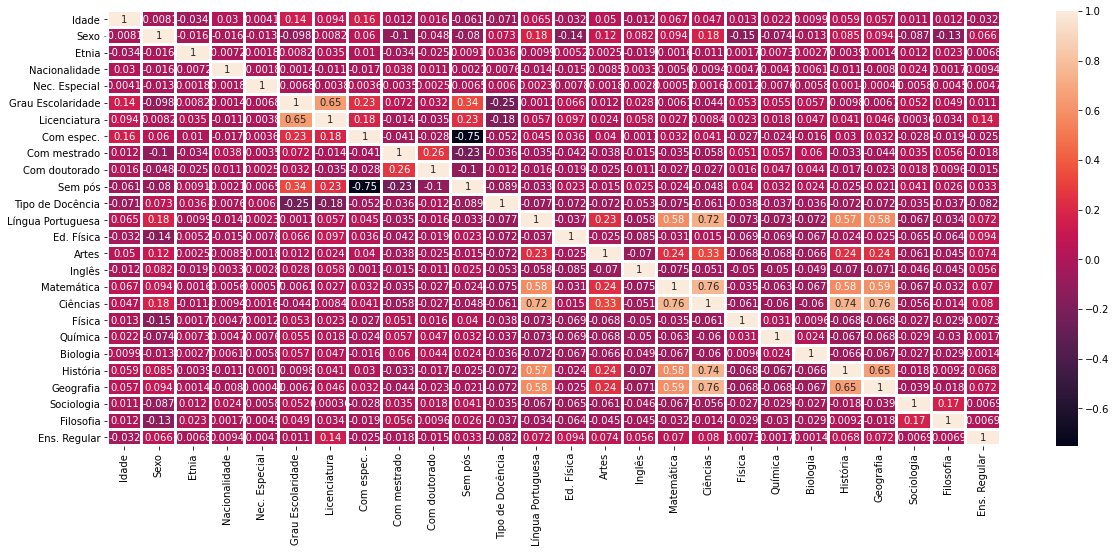

In [19]:
dados_corr = dados_1.drop(['Mês Nasc.', 'Ano Nasc.'], axis=1)
# dados_corr = dados_1[['Idade', 'Sexo', 'Etnia', 'Nec. Especial', 'Licenciatura', 'Com espec.', 'Com mestrado', 'Com doutorado', 'Sem pós']]

plt.figure(figsize=(20,8))
sns.heatmap(dados_corr.corr(), annot=True, linewidth=2)
plt.show()

In [20]:
# def plot_corr(df, size=20):
#     corr = df.corr()    
#     fig, ax = plt.subplots(figsize = (size, size))
#     ax.matshow(corr)  
#     plt.xticks(range(len(corr.columns)), corr.columns) 
#     plt.yticks(range(len(corr.columns)), corr.columns) 

# plot_corr(dados_corr)

In [21]:
# Para este caso, queremos descobrir o número de professores que temos por matérias, portanto será usado um dataframe somente das matérias

# result = print(lambda x: x, dados_1.sum())
materias = pd.DataFrame(dados_1[['Língua Portuguesa', 'Ed. Física', 'Artes', 'Inglês', 'Matemática',
       'Ciências', 'Física', 'Química', 'Biologia', 'História', 'Geografia',
       'Sociologia', 'Filosofia']])

materias

,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Os valores NaN, neste caso, podem ser substituídos por 0, para efeito de contagem e adequação da tabela

materias.fillna(0, inplace=True)
materias.isna().sum()

Língua Portuguesa    0
Ed. Física           0
Artes                0
Inglês               0
Matemática           0
Ciências             0
Física               0
Química              0
Biologia             0
História             0
Geografia            0
Sociologia           0
Filosofia            0
dtype: int64

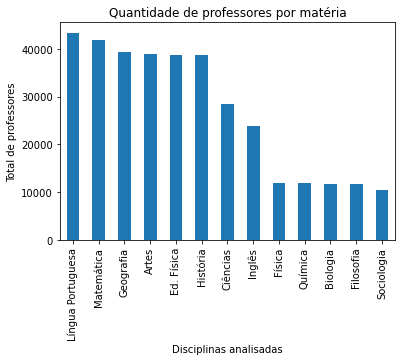

In [23]:
#Aqui verificamos o número de professores por disciplina, analisando se há discrepância no gráfico analisdo

soma_materias = lambda x: x, materias.sum()

materias.sum().sort_values(ascending=False).plot.bar(title="Quantidade de professores por matéria")
plt.xlabel("Disciplinas analisadas")
plt.ylabel("Total de professores")

soma_materias = list(soma_materias)
df_sum_mat = pd.DataFrame(soma_materias, columns = ['Soma'])

# print(soma_materias)

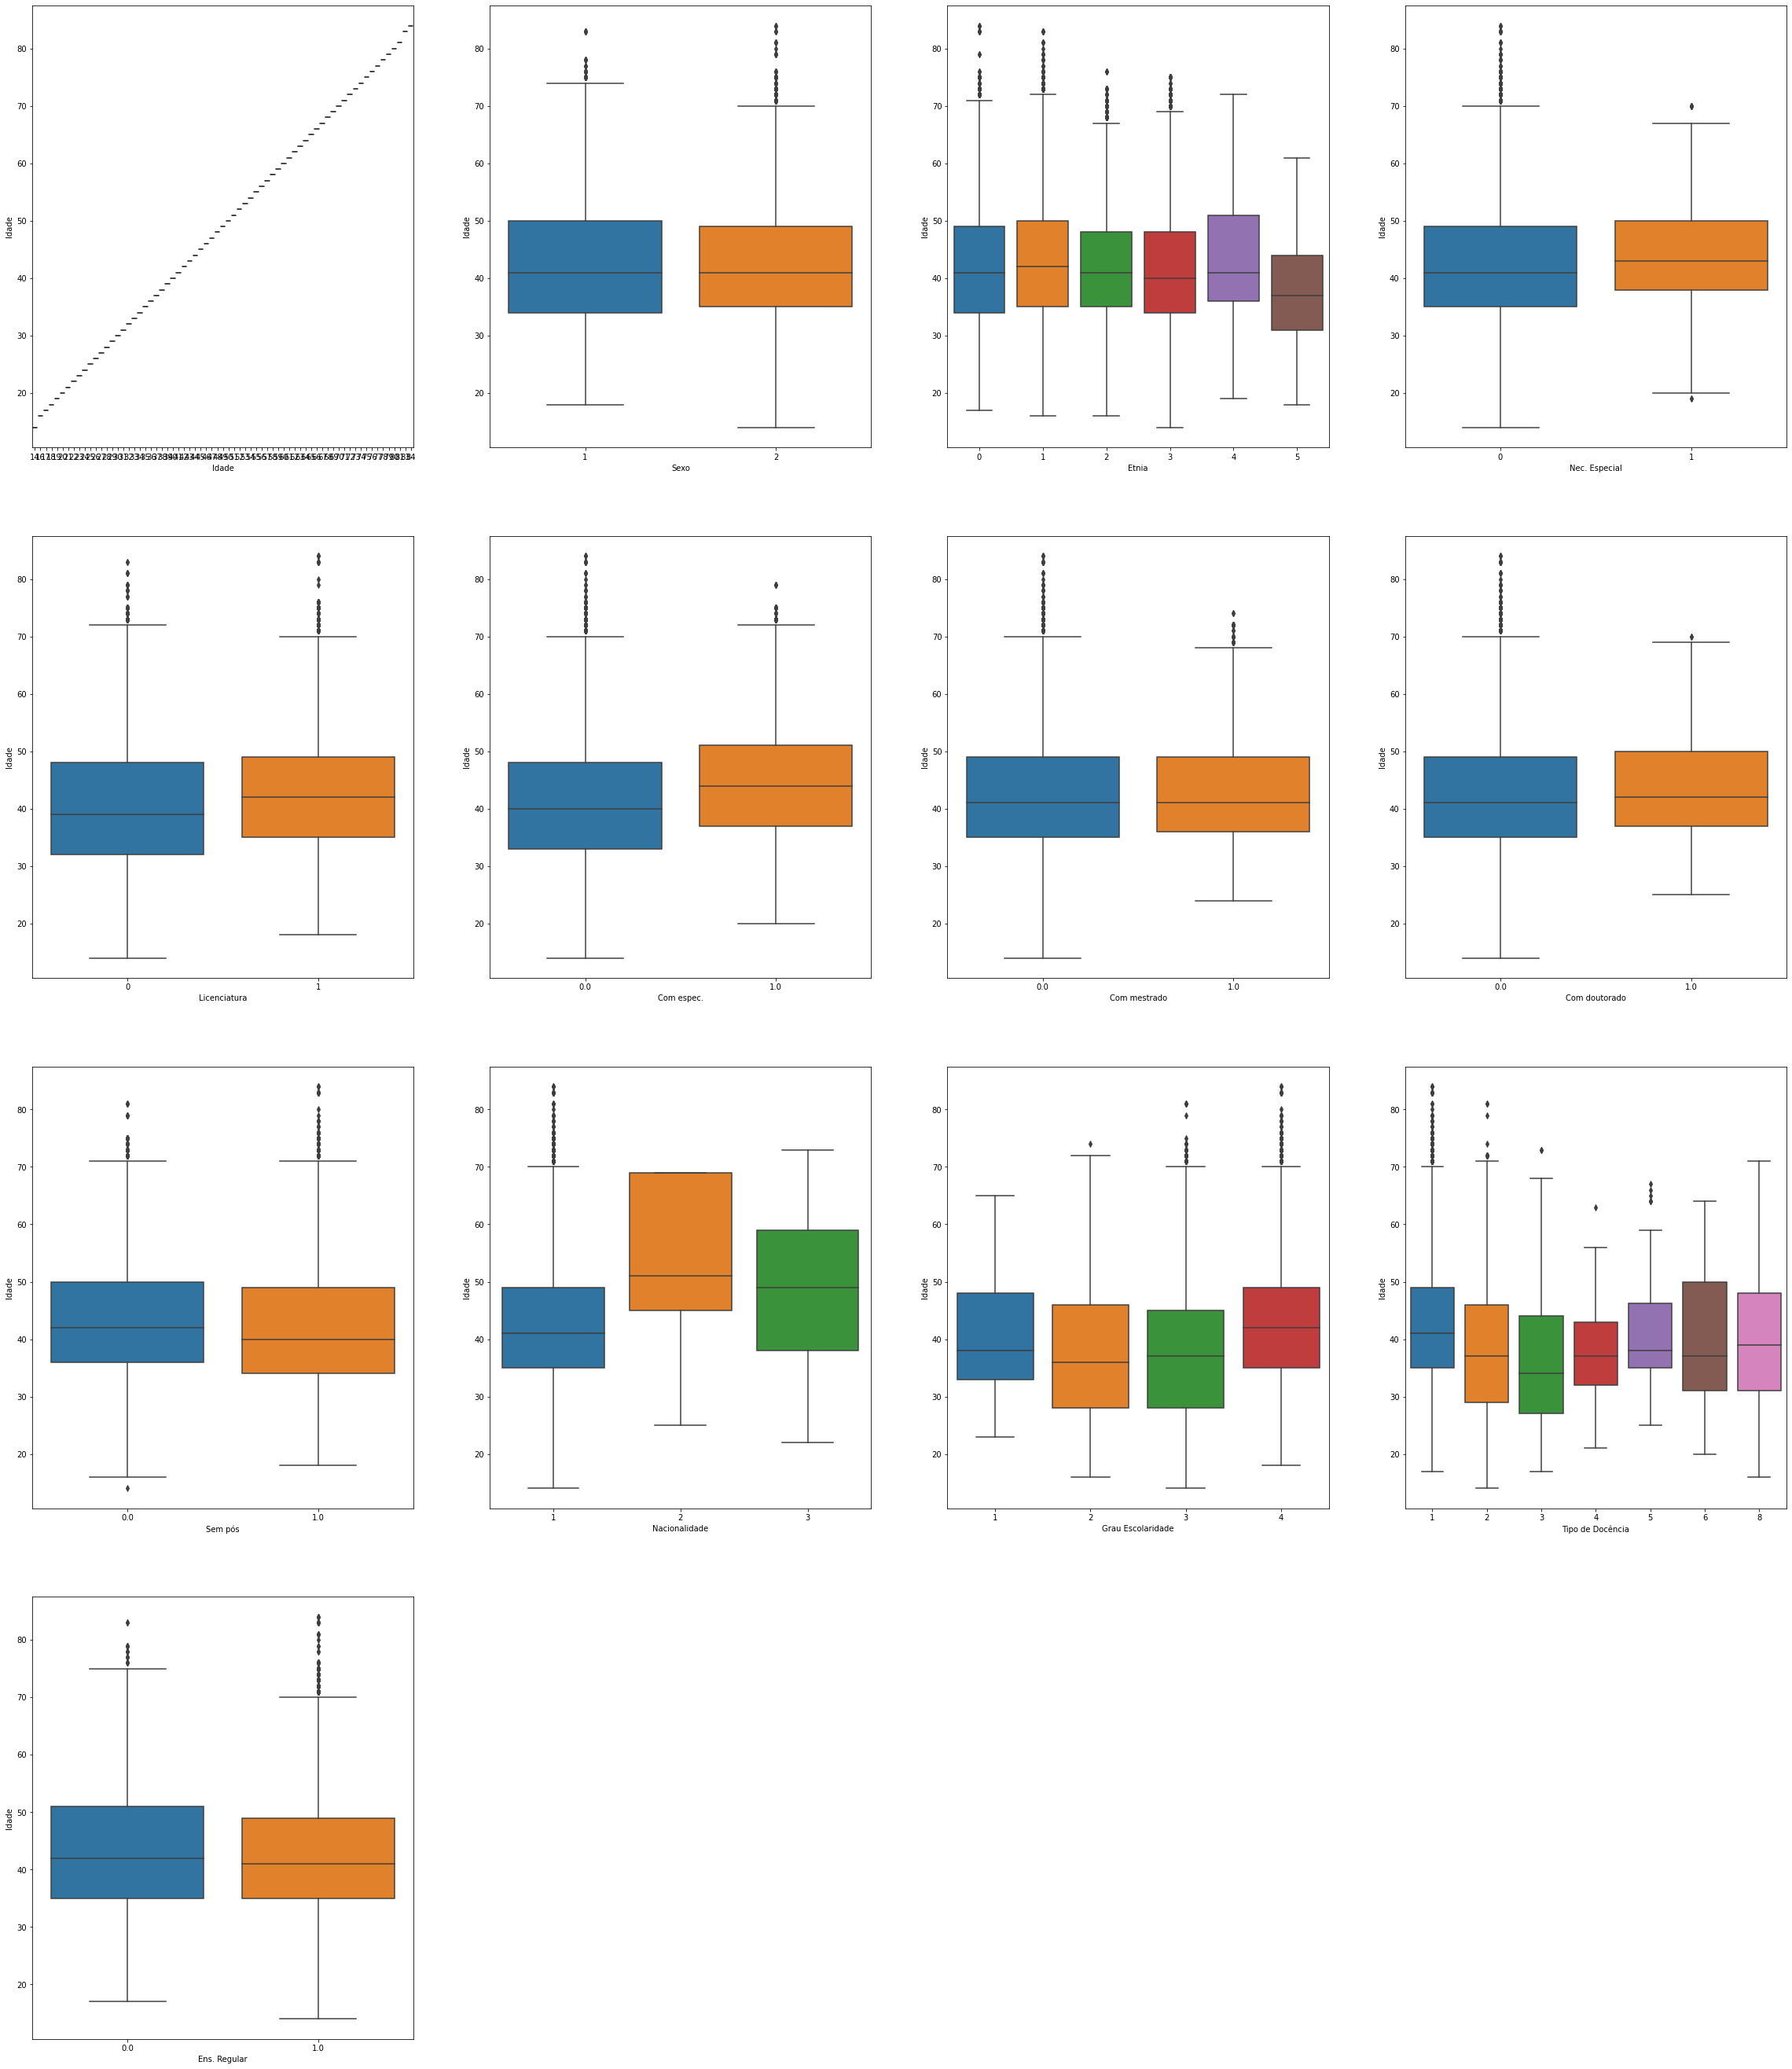

In [24]:
sub = dados_1[['Idade', 'Sexo', 'Etnia', 'Nec. Especial', 'Licenciatura', 'Com espec.', 'Com mestrado', 'Com doutorado', 'Sem pós', 'Nacionalidade', 'Grau Escolaridade', 'Tipo de Docência', 'Ens. Regular']]

plt.figure(figsize = (40,60))
x = 1
for d in sub:
    plt.subplot(5, 4, x)
    sns.boxplot(data = sub, x = d, y = 'Idade')
    x += 1

In [66]:
dados_1.drop(['Mês Nasc.', 'Ano Nasc.'], axis=1).describe()

,Idade,Sexo,Etnia,Nacionalidade,Nec. Especial,Grau Escolaridade,Licenciatura,Com espec.,Com mestrado,Com doutorado,Sem pós,Tipo de Docência,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia,Ens. Regular
count,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000
mean,42.059540,1.699788,1.284941,1.004178,0.001522,3.896474,0.802115,0.344100,0.047002,0.009903,0.517629,1.152942,0.133290,0.118791,0.119701,0.073317,0.128479,0.087373,0.036844,0.036657,0.035845,0.118647,0.120602,0.032088,0.035682,0.899207
std,10.048288,0.458351,0.984240,0.090489,0.038981,0.320050,0.398405,0.475075,0.211644,0.099019,0.499690,0.778774,0.339889,0.323543,0.324612,0.260656,0.334623,0.282382,0.188380,0.187918,0.185904,0.323373,0.325665,0.176235,0.185497,0.301055
min,14.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,1.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,41.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,2.000000,2.000000,1.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,84.000000,2.000000,5.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Analisando modelos para previsão de novos professores

Um grande problema apresentado na região do autor deste notebook é: o número de novos professores de matemática para as vagas na região de Itaquaquecetuba, em São Paulo, é pequeno para a quantidade de aulas que existem atualmente. 

Será que podemos prever se, de acordo com as características dos professores que se cadastram nas diretorias de ensino da região sudeste do país, podemos prever o número de professores que será de matemática, seguindo a premissa (ideia) de suprir a demanda de aulas vagas nesta matéria?

In [67]:
# Previsão para o futuro
df1 = dados_1[:500].copy().drop(['ID_DOCENTE', 'Mês Nasc.', 'Ano Nasc.'], axis=1)
df1 

,Idade,Sexo,Etnia,Nacionalidade,Nec. Especial,Grau Escolaridade,Licenciatura,Com espec.,Com mestrado,Com doutorado,Sem pós,Tipo de Docência,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia,Ens. Regular
0,33,1,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33,1,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,1,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,38,2,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
737,38,2,1,1,0,4,1,0.0,0.0,0.0,1.0,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
738,63,2,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739,63,2,1,1,0,4,1,0.0,0.0,0.0,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
num_true = len(df1.loc[df1['Matemática'] == True])
num_false = len(df1.loc[df1['Matemática'] == False])
print("Número de Casos de Professores de Matemática: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Negativos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos de Professores de Matemática: 64 (12.80%)
Número de Casos Negativos     : 436 (87.20%)


In [167]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

data = df1[['Sexo', 'Etnia', 'Nec. Especial', 'Licenciatura', 'Com espec.', 'Com mestrado', 'Com doutorado', 'Sem pós', 'Nacionalidade', 'Grau Escolaridade', 'Tipo de Docência', 'Ens. Regular', 'Língua Portuguesa']]
# data = df1
target = df1['Matemática']

f_classif = SelectKBest(score_func=f_classif, k=8)
fit = f_classif.fit(data,target)
features = fit.transform(data)

# Visualizando as features:
# print(features)

cols = fit.get_support(indices=True)
df1.iloc[:,cols]

C:\Users\sergi\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [2 8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\sergi\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Nacionalidade,Nec. Especial,Grau Escolaridade,Licenciatura,Com doutorado,Sem pós,Tipo de Docência,Língua Portuguesa
0,1,0,4,1,0.0,1.0,1,0.0
1,1,0,4,1,0.0,1.0,1,0.0
2,1,0,4,1,0.0,1.0,1,0.0
3,1,0,4,1,0.0,1.0,1,0.0
4,1,0,4,1,0.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...
736,1,0,4,1,0.0,1.0,1,0.0
737,1,0,4,1,0.0,1.0,1,1.0
738,1,0,4,1,0.0,1.0,1,0.0
739,1,0,4,1,0.0,1.0,1,0.0


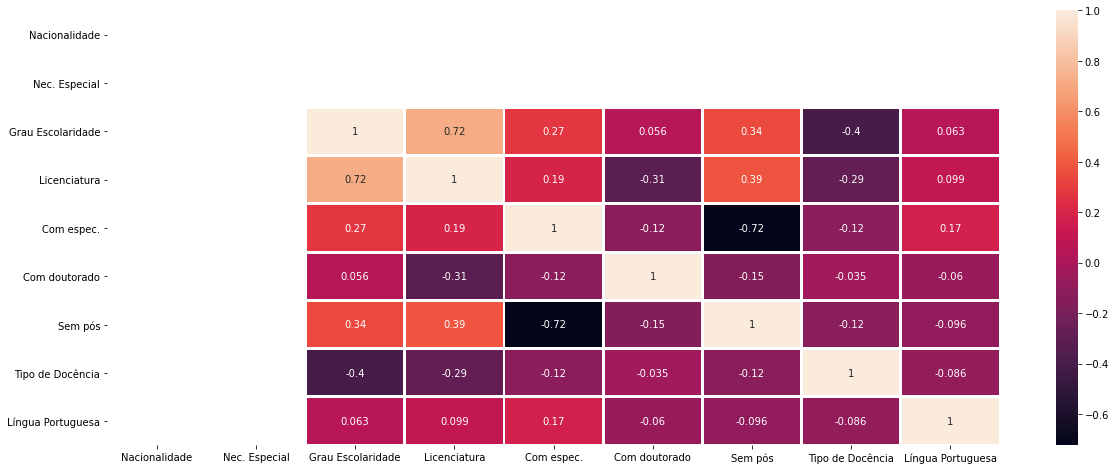

In [168]:
# dados_corr = df1[['Etnia', 'Sexo', 'Nacionalidade', 'Grau Escolaridade','Licenciatura', 'Com espec.', 'Sem pós', 'Tipo de Docência']]
dados_corr = df1[['Nacionalidade', 'Nec. Especial', 'Grau Escolaridade', 'Licenciatura', 'Com espec.', 'Com doutorado','Sem pós', 'Tipo de Docência', 'Língua Portuguesa']]

plt.figure(figsize=(20,8))
sns.heatmap(dados_corr.corr(), annot=True, linewidth=2)
plt.show()

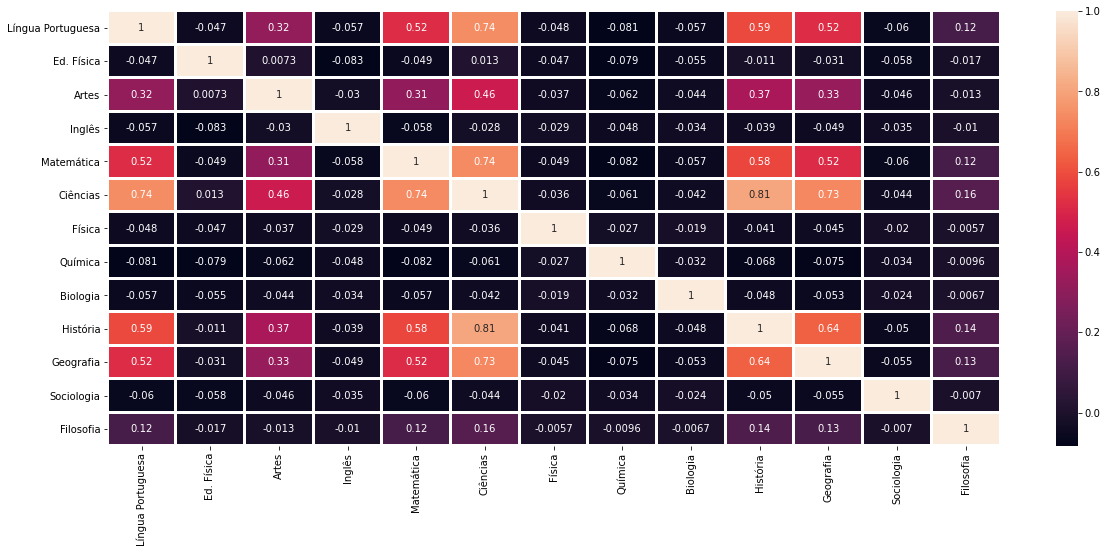

In [169]:
dados_corr = df1[['Língua Portuguesa', 'Ed. Física', 'Artes', 'Inglês', 'Matemática',
       'Ciências', 'Física', 'Química', 'Biologia', 'História', 'Geografia',
       'Sociologia', 'Filosofia']]

plt.figure(figsize=(20,8))
sns.heatmap(dados_corr.corr(), annot=True, linewidth=2)
plt.show()

### Analisando com SVM

In [170]:
## teste para descobrir como se comporta o modelo de classificação aos dados do projeto

from sklearn import svm
from sklearn.model_selection import  train_test_split

In [171]:
data = df1[['Nacionalidade', 'Nec. Especial', 'Grau Escolaridade', 'Licenciatura', 'Com espec.', 'Com doutorado','Sem pós', 'Tipo de Docência', 'Língua Portuguesa']]
target = df1['Matemática']

data.fillna(0, inplace=True)
target.fillna(0, inplace=True)

x = data
y = target


C:\Users\sergi\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [172]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [173]:
classifier = svm.SVC(C=1.0)

In [174]:
classifier.fit(x_train, y_train)

SVC()

In [175]:
print(classifier.predict(x_test))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0.]


In [176]:
classifier.score(x_test, y_test)

0.888

In [177]:
classificacao = classifier.predict(data)
df1['classificacao'] = classificacao

df1[['Matemática', 'classificacao']]

,Matemática,classificacao
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
736,0.0,0.0
737,1.0,1.0
738,0.0,0.0
739,0.0,0.0


In [178]:
df1['diff'] = df1['Matemática'] - df1['classificacao']

df1['diff'].value_counts()

 0.0    447
 1.0     27
-1.0     26
Name: diff, dtype: int64

### Decision Tree Regressor

In [179]:
#teste com o decision tree regressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

tester = DecisionTreeRegressor(max_leaf_nodes=1000) #teste
tester.fit(x_train, y_train)

predicao = tester.predict(x_test)

np.sqrt(mean_squared_error(y_test, predicao))

0.2800255146894225

In [180]:
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

def get_mae(max_leaf_nodes, train_x, test_x, train_y, test_y):
    tester = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    tester.fit(x_train, y_train)
    predict_mae = tester.predict(x_test)
    mae = mean_absolute_error(y_test, predict_mae)
    return mae

In [181]:
candidates_max_nodes = [5, 10, 50, 100, 250, 500, 1000]

error = 1e10
for candidate in candidates_max_nodes:
    erro_no_loop = get_mae(candidate, x_train, x_test, y_train, y_test)
    
    if erro_no_loop < error:
        error = erro_no_loop
        best_tree_size = error
        
print(best_tree_size, candidate)

0.13460457099080697 1000


In [182]:
tester.score(x_test, y_test)

0.39195062182471174

[Text(174.375, 201.90857142857143, 'X[8] <= 0.5\nmse = 0.112\nsamples = 375\nvalue = 0.128'),
 Text(97.65, 170.84571428571428, 'X[2] <= 3.5\nmse = 0.052\nsamples = 324\nvalue = 0.056'),
 Text(69.75, 139.78285714285715, 'mse = 0.0\nsamples = 43\nvalue = 0.0'),
 Text(125.55000000000001, 139.78285714285715, 'X[3] <= 0.5\nmse = 0.06\nsamples = 281\nvalue = 0.064'),
 Text(55.800000000000004, 108.72, 'X[4] <= 0.5\nmse = 0.173\nsamples = 27\nvalue = 0.222'),
 Text(27.900000000000002, 77.65714285714284, 'mse = 0.0\nsamples = 14\nvalue = 0.0'),
 Text(83.7, 77.65714285714284, 'mse = 0.249\nsamples = 13\nvalue = 0.462'),
 Text(195.3, 108.72, 'X[6] <= 0.5\nmse = 0.045\nsamples = 254\nvalue = 0.047'),
 Text(139.5, 77.65714285714284, 'X[4] <= 0.5\nmse = 0.01\nsamples = 99\nvalue = 0.01'),
 Text(111.60000000000001, 46.59428571428572, 'mse = 0.0\nsamples = 5\nvalue = 0.0'),
 Text(167.4, 46.59428571428572, 'X[7] <= 2.0\nmse = 0.011\nsamples = 94\nvalue = 0.011'),
 Text(139.5, 15.531428571428563, 'mse =

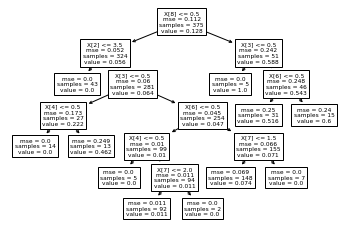

In [183]:
plot_tree(tester)

In [184]:
classificacao = tester.predict(data)
df1['classificacao'] = classificacao

df1[['Matemática', 'classificacao']]

,Matemática,classificacao
0,1.0,0.074324
1,1.0,0.074324
2,1.0,0.074324
3,1.0,0.074324
4,1.0,0.074324
...,...,...
736,0.0,0.074324
737,1.0,0.600000
738,0.0,0.074324
739,0.0,0.074324


In [185]:
df1['diff'] = df1['Matemática'] - df1['classificacao']

df1['diff'].value_counts().to_frame()

,diff
-0.074324,182
-0.010870,123
0.000000,102
0.483871,20
-0.516129,17
0.925676,15
0.400000,11
0.538462,9
-0.461538,9
-0.600000,9


### Random Forest

In [186]:
#Usando randomforest Classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=100, 
    random_state=10, 
    criterion='gini', 
    max_depth=10, 
    min_samples_leaf=2
)

clf.fit(x_train, y_train)

pred2 = clf.predict(x_test)

np.sqrt(mean_squared_error(y_test, pred2))

0.3286335345030997

In [187]:
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

def get_mae(max_leaf_nodes, train_x, test_x, train_y, test_y):
    clf = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    clf.fit(x_train, y_train)
    predict_mae = clf.predict(x_test)
    mae = mean_absolute_error(y_test, predict_mae)
    return mae

In [188]:
candidates_max_nodes = [5, 10, 50, 100, 250, 500, 1000]

error = 1e10
for candidate in candidates_max_nodes:
    erro_no_loop = get_mae(candidate, x_train, x_test, y_train, y_test)
    
    if erro_no_loop < error:
        error = erro_no_loop
        best_tree_size = error
        
print(best_tree_size, candidate)

0.108 1000


In [189]:
ms = clf.score(x_test, y_test) 

print("Exatidão (Accuracy): {0:.2f}".format(ms))
print()

Exatidão (Accuracy): 0.89



In [190]:
probabilidade = clf.predict_proba(data)[:,1]
classificacao = clf.predict(data)

df1['probabilidade'] = probabilidade
df1['classificacao'] = classificacao

df1[['Matemática', 'probabilidade', 'classificacao']]

,Matemática,probabilidade,classificacao
0,1.0,0.093650,0.0
1,1.0,0.093650,0.0
2,1.0,0.093650,0.0
3,1.0,0.093650,0.0
4,1.0,0.093650,0.0
...,...,...,...
736,0.0,0.093650,0.0
737,1.0,0.582879,1.0
738,0.0,0.093650,0.0
739,0.0,0.093650,0.0


In [191]:
df1['diff'] = df1['Matemática'] - df1['classificacao']

df1['diff'].value_counts()

 0.0    444
 1.0     47
-1.0      9
Name: diff, dtype: int64

### Naive Bayes

In [192]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

modelo_v1 = GaussianNB()

modelo_v1.fit(x_train, y_train.ravel())

GaussianNB()

In [193]:
nb_predict_train = modelo_v1.predict(x_test)

print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_train)))

Exatidão (Accuracy): 0.2480


### Logistic Regression



In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

logit = LogisticRegression()

In [195]:
logit.fit(x_train, y_train)

LogisticRegression()

In [196]:
y_pred = logit.predict(x_test)

y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [197]:
# acuracia
logit.score(x_test, y_test)

# matriz de confusao
print(confusion_matrix(y_test, y_pred))

# outras metricas
print(classification_report(y_test, y_pred))

[[217   3]
 [ 24   6]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       220
         1.0       0.67      0.20      0.31        30

    accuracy                           0.89       250
   macro avg       0.78      0.59      0.62       250
weighted avg       0.87      0.89      0.87       250



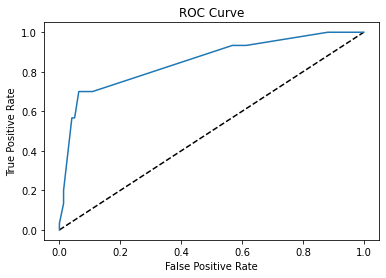

In [198]:
y_pred_prob = logit.predict_proba(x_test)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Testando o modelo com os dados novos do dataset

O modelo que, por testes, melhor obteve resultados para prever o novo número de professores de matemática, a partir de características de idade, sexo, e até mesmo em relação a outras matérias, é o modelo de random forest.

In [199]:
#Verificando quantos professores, a partir do conjunto de dados, serão da matéria de matemática
df2 = dados_1[200000:201000].drop(['ID_DOCENTE', 'Mês Nasc.', 'Ano Nasc.'], axis=1)

data = df2[['Nacionalidade', 'Nec. Especial', 'Grau Escolaridade', 'Licenciatura', 'Com espec.', 'Com doutorado','Sem pós', 'Tipo de Docência', 'Língua Portuguesa']]
target = df2['Matemática']

data.fillna(0, inplace=True)
target.fillna(0, inplace=True)

x = data
y = target

C:\Users\sergi\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [200]:
pred1 = clf.predict(data)

np.sqrt(mean_squared_error(target, pred1))

0.34351128074635334

In [201]:
print(pred1.sum(), '|', clf.score(data, target), '|', np.unique(pred1, return_counts=True))

98.0 | 0.882 | (array([0., 1.]), array([902,  98], dtype=int64))


Text(0.5, 1.0, 'Importância de cada feature')

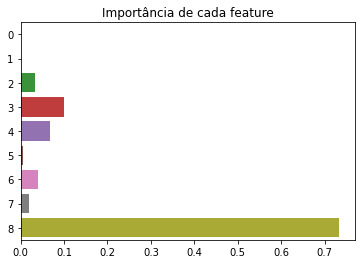

In [202]:
importances = pd.Series(data=clf.feature_importances_)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [203]:
print(round((df2['Matemática'].sum()/df2['Matemática'].count())*100, 2), '% do total da contagem é de professores de Matemática')

15.0 % do total da contagem é de professores de Matemática


In [204]:
probabilidade = clf.predict_proba(data)[:,1]

df2['Probabilidade'] = probabilidade
df2['Predict'] = pred1

df2.index = np.arange(1, len(df2) + 1)

# pd.set_option("max_rows", None)
df2[['Matemática', 'Predict', 'Probabilidade']]

,Matemática,Predict,Probabilidade
1,0.0,0.0,0.093650
2,0.0,0.0,0.093650
3,0.0,0.0,0.093650
4,0.0,0.0,0.093650
5,0.0,0.0,0.093650
...,...,...,...
996,0.0,0.0,0.031963
997,0.0,0.0,0.031963
998,1.0,0.0,0.434387
999,0.0,0.0,0.093650


In [205]:
df2['Matemática'].sum()

150.0

In [206]:
df2['Predict'].sum()

98.0

In [207]:
df2['Diff'] = df2['Matemática'] - df2['Predict']

df2['Diff'].value_counts()

 0.0    882
 1.0     85
-1.0     33
Name: Diff, dtype: int64

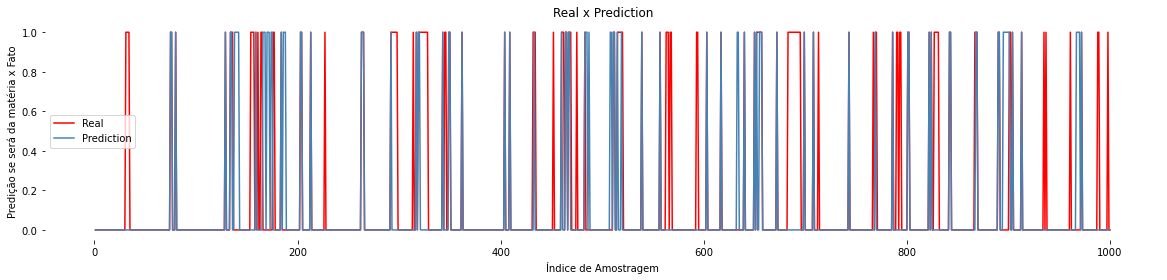

In [208]:
plt.figure(figsize=(20, 4))

sns.lineplot(data = df2, x = df2.index, y = 'Matemática', label = 'Real', color = 'red')
sns.lineplot(data = df2, x = df2.index, y = 'Predict', label = 'Prediction', color = 'steelblue')
plt.title('Real x Prediction')
plt.xlabel('Índice de Amostragem')
plt.ylabel('Predição se será da matéria x Fato')
sns.despine(bottom = True, left = True)

In [209]:
# Seguindo a linha de entender os erros e acertos de predição, e o quanto o modelo pode ser preciso, verificamos essa diferença
difference_pred = df2[['Matemática', 'Predict']].loc[df2['Matemática'] != df2['Predict']]
beautiful_pred = df2[['Matemática', 'Predict']].loc[df2['Matemática'] == df2['Predict']]
n_of_rows = df2['Matemática'].count()

print('A porcentagem de acerto do modelo foi de {}%, com {} erros, em uma amostragem de {} dados'.format(
      (round(
      (beautiful_pred['Predict'].count() / (beautiful_pred['Predict'].count() + difference_pred['Predict'].count())
      ) * 100, 2)),
      difference_pred['Predict'].count(),
    n_of_rows
    )
)


A porcentagem de acerto do modelo foi de 88.2%, com 118 erros, em uma amostragem de 1000 dados


In [210]:
#Predições Corretas do Modelo
beautiful_pred.value_counts().to_frame()

,,0
Matemática,Predict,
0.0,0.0,817
1.0,1.0,65


In [211]:
#Predições Ruins
difference_pred.value_counts().to_frame()

,,0
Matemática,Predict,
1.0,0.0,85
0.0,1.0,33
